In [19]:
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print('x_train.shape:', x_train.shape)

ModuleNotFoundError: No module named 'tensorflow'

NameError: name 'x_train' is not defined

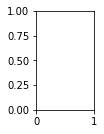

In [11]:
import matplotlib.pyplot as plt

for index in range(10):
  plt.subplot(2, 5, index+1)
  plt.imshow(x_train[index], vmin=0, vmax=255)

plt.tight_layout()

In [7]:
# Cast Data so Tf can manipulate matrices
x_train = tf.cast(x_train, dtype=tf.float32)
y_train = tf.cast(y_train, dtype=tf.int32)
x_test = tf.cast(x_test, dtype=tf.float32)
y_test = tf.cast(y_test, dtype=tf.int32)

# The raw data are in range [0, 255], we scale it to [-1, 1].
x_train = (x_train - 127.5) / 127.5
x_test = (x_test - 127.5) / 127.5

#one hot
num_class = tf.reduce_max(y_train) + 1
y_tr = tf.one_hot(tf.squeeze(y_train), num_class)
y_te = tf.one_hot(tf.squeeze(y_test), num_class)



print('x_train.shape:', x_train.shape)


NameError: name 'tf' is not defined

In [8]:
 # ONLY RUN ONCE!! 
    
# The data loaded from TF is in tensor format. Due to its greyscale nature, it 
# does not have the channel dimension, so we expand the data
# TF supports two image format: NCHW (channels_first) and NHWC (channels_last), both are fine.
x_train = tf.expand_dims(x_train, axis=1)  # convert to shape NCHW: 60000x1x28x28
x_test = tf.expand_dims(x_test, axis=1)

NameError: name 'tf' is not defined

In [46]:
#create basic model
from tensorflow.keras import layers

# 2.2 build the model
model = tf.keras.Sequential(name='plainCNN')
# if we want to add L2 regularization, we could pass 
# "kernel_regularizer=tf.keras.regularizers.l2(l=0.01)"
# to layers.Conv2D
model.add(layers.Conv2D(
    16, kernel_size=3, strides=2, padding='same', data_format='channels_last', 
    activation='relu', input_shape=(1,28,28), name='conv1'))
model.add(layers.Conv2D(
    32, kernel_size=3, strides=2, padding='same', data_format='channels_last', 
    activation='relu', name='conv2'))
model.add(layers.Conv2D(
    64, kernel_size=3, strides=2, padding='same', data_format='channels_last', 
    activation='relu', name='conv3'))
model.add(layers.GlobalMaxPool2D(data_format='channels_last', name='max-pool'))
model.add(layers.Dense(10, activation=None, name='output'))  # None means no activation or linear

model.summary()


Model: "plainCNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 1, 14, 16)         4048      
_________________________________________________________________
conv2 (Conv2D)               (None, 1, 7, 32)          4640      
_________________________________________________________________
conv3 (Conv2D)               (None, 1, 4, 64)          18496     
_________________________________________________________________
max-pool (GlobalMaxPooling2D (None, 64)                0         
_________________________________________________________________
output (Dense)               (None, 10)                650       
Total params: 27,834
Trainable params: 27,834
Non-trainable params: 0
_________________________________________________________________


In [47]:
from tensorflow.keras.optimizers.schedules import PiecewiseConstantDecay

batch_size = 64
num_instance = 50000
# Let's say, if we want to decay the learning rate at 40, 80, 160 epochs
boundary = (40*num_instance // batch_size, 80*num_instance // batch_size, 160*num_instance // batch_size)
value = (1e-3, 3e-4, 1e-4, 3e-5)
learning_rate = PiecewiseConstantDecay(boundary, value)
print(learning_rate)

# in the loss, from_logits=True because we use linear activation at the last layer
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate),
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
    metrics=['accuracy'])

print('Model compiled.')

Model compiled.


In [1]:
# Train the model
epochs = 60
history = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size)

NameError: name 'model' is not defined

In [18]:
print("NewCheckpoint")

NewCheckpoint
